In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics
from sklearn import preprocessing
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
import itertools

In [2]:
df = pd.read_csv('dataset.csv')
df.head()


,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0


In [3]:
label_encoder = preprocessing.LabelEncoder() 
df['SEX'] = label_encoder.fit_transform(df['AGE'])
df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,32,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,35,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,69,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,17,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,35,0


In [4]:
df['MCH'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
3304    False
3305    False
3306    False
3307    False
3308    False
Name: MCH, Length: 3309, dtype: bool

In [5]:
df['LEUCOCYTE'].value_counts()

LEUCOCYTE
6.2     54
7.1     53
6.3     52
7.0     51
7.3     49
        ..
33.3     1
32.3     1
23.1     1
27.8     1
22.5     1
Name: count, Length: 255, dtype: int64

In [6]:
df['MCHC'].value_counts(normalize =True)

MCHC
33.3    0.045331
33.2    0.042007
33.0    0.039589
33.5    0.038682
33.1    0.037171
          ...   
38.1    0.000302
37.4    0.000302
29.5    0.000302
26.4    0.000302
26.1    0.000302
Name: proportion, Length: 101, dtype: float64

In [7]:
df.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
count,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000
mean,38.226111,12.749350,4.544802,8.715533,258.893019,28.230039,33.336476,84.611333,46.644303,45.641886,0.398005
std,5.971943,2.084325,0.784510,4.991299,112.676139,2.696520,1.247055,6.916079,21.874106,21.868593,0.489561
min,13.700000,3.800000,1.480000,1.100000,10.000000,14.900000,26.000000,54.000000,1.000000,0.000000,0.000000
25%,34.300000,11.400000,4.040000,5.700000,191.000000,27.200000,32.700000,81.500000,29.000000,28.000000,0.000000
50%,38.700000,12.900000,4.580000,7.600000,257.000000,28.700000,33.400000,85.300000,48.000000,47.000000,0.000000
75%,42.500000,14.200000,5.060000,10.300000,322.000000,29.800000,34.100000,88.800000,64.000000,63.000000,1.000000
max,69.000000,18.900000,7.860000,76.600000,1121.000000,40.800000,38.400000,115.600000,99.000000,94.000000,1.000000


In [8]:
df['MCV'].value_counts()

MCV
86.6    35
87.6    34
85.1    33
85.3    32
85.4    31
        ..
96.3     1
54.0     1
67.4     1
60.6     1
60.2     1
Name: count, Length: 390, dtype: int64

<Axes: xlabel='SOURCE', ylabel='Count'>

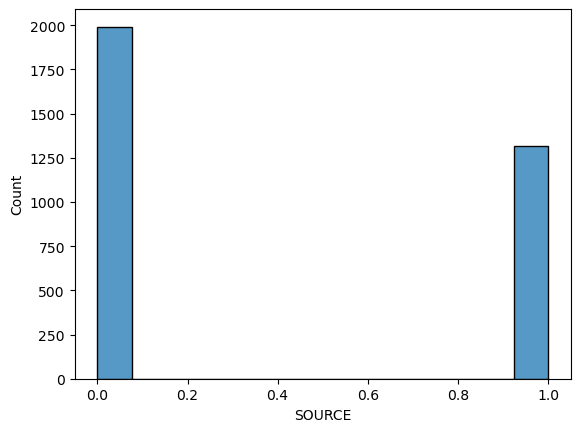

In [9]:
sns.histplot(df['SOURCE'])

In [10]:
df.groupby('THROMBOCYTE')['SEX'].describe()

,count,mean,std,min,25%,50%,75%,max
THROMBOCYTE,,,,,,,,
10,4.0,52.5,11.789826,44.0,44.0,48.5,57.0,69.0
12,2.0,24.0,0.000000,24.0,24.0,24.0,24.0,24.0
14,2.0,68.0,0.000000,68.0,68.0,68.0,68.0,68.0
15,4.0,43.0,14.742230,24.0,39.0,44.0,48.0,60.0
17,1.0,60.0,NaN,60.0,60.0,60.0,60.0,60.0
...,...,...,...,...,...,...,...,...
872,1.0,69.0,NaN,69.0,69.0,69.0,69.0,69.0
895,1.0,63.0,NaN,63.0,63.0,63.0,63.0,63.0
910,1.0,82.0,NaN,82.0,82.0,82.0,82.0,82.0


In [11]:
df.groupby('ERYTHROCYTE')['AGE'].describe()

,count,mean,std,min,25%,50%,75%,max
ERYTHROCYTE,,,,,,,,
1.48,1.0,68.0,NaN,68.0,68.0,68.0,68.0,68.0
1.72,1.0,75.0,NaN,75.0,75.0,75.0,75.0,75.0
1.80,1.0,79.0,NaN,79.0,79.0,79.0,79.0,79.0
1.93,1.0,58.0,NaN,58.0,58.0,58.0,58.0,58.0
1.98,1.0,70.0,NaN,70.0,70.0,70.0,70.0,70.0
...,...,...,...,...,...,...,...,...
7.54,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
7.57,1.0,58.0,NaN,58.0,58.0,58.0,58.0,58.0
7.61,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0


C:\Users\Shaikh Fayaz\.conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


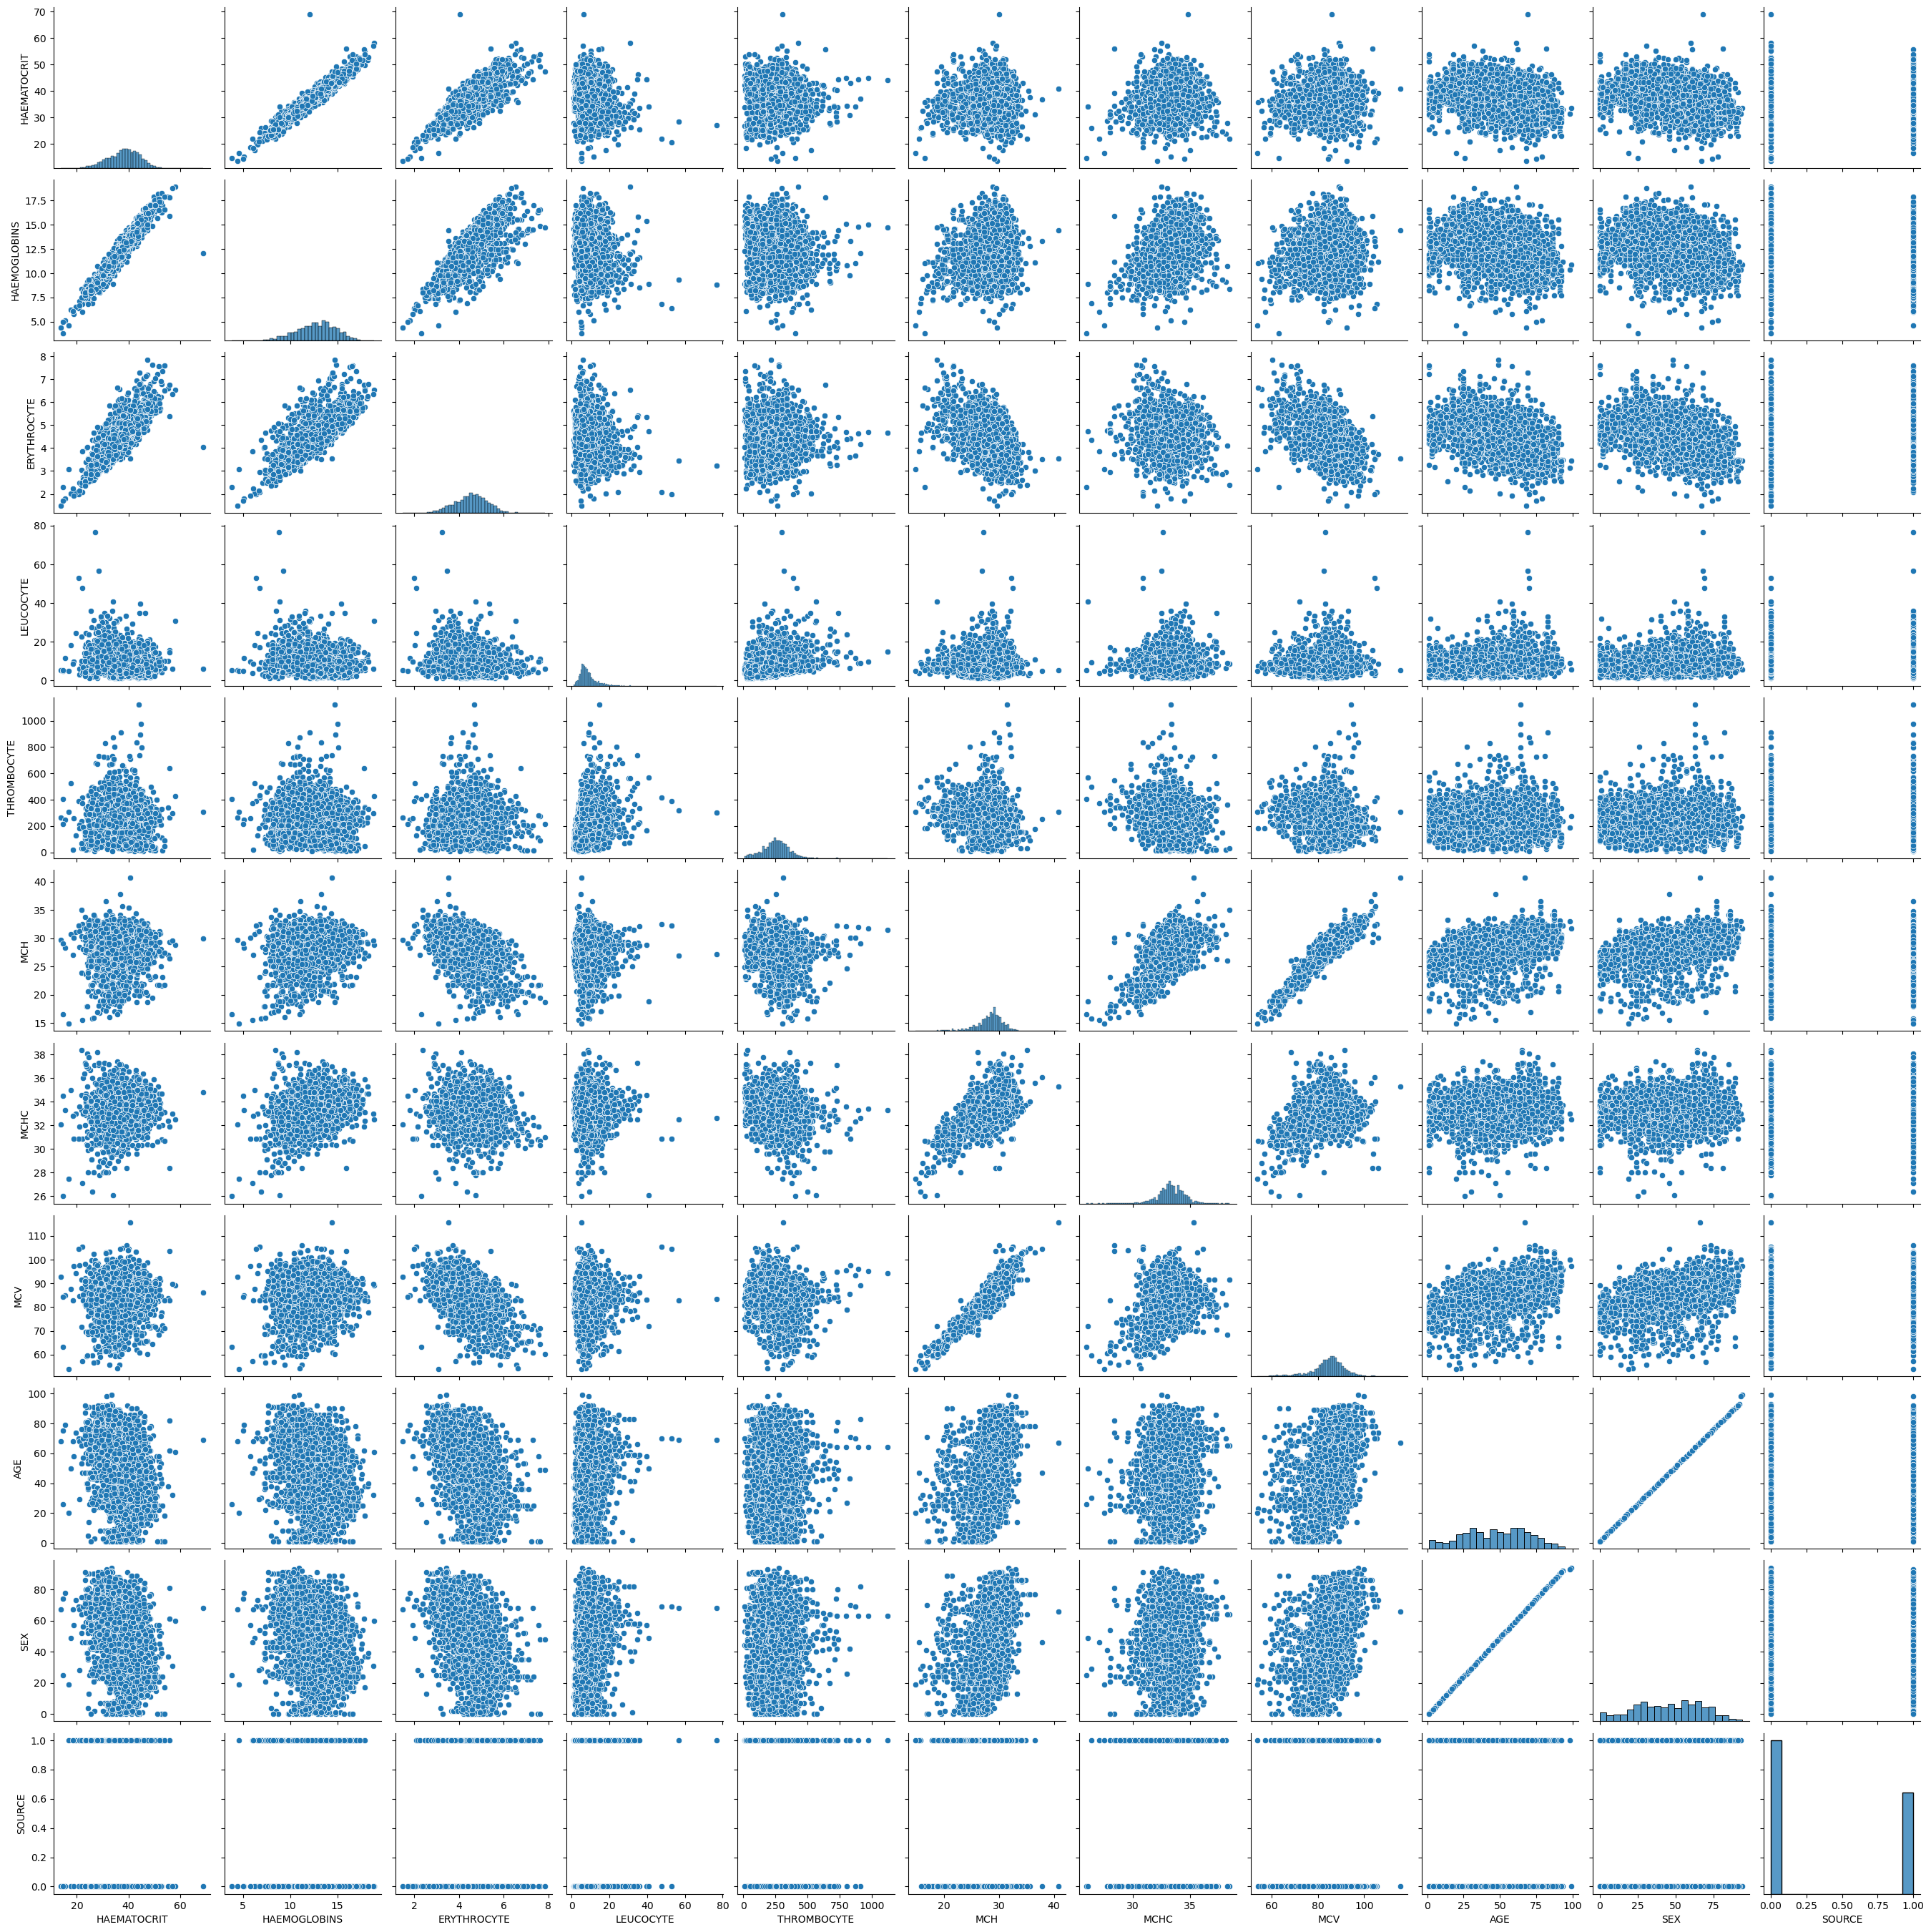

In [12]:
sns.pairplot(data = df)

In [13]:
df['HAEMOGLOBINS'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
3304    False
3305    False
3306    False
3307    False
3308    False
Name: HAEMOGLOBINS, Length: 3309, dtype: bool

In [14]:
df = pd.read_csv('dataset.csv')
df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0


In [15]:
#Train/Test Split - Apply a sampling distribution to find the best split
delays_df = pd.read_csv('dataset.csv')
delays_df.shape

(3309, 11)

In [16]:
X = delays_df.loc[:,['HAEMATOCRIT', 'LEUCOCYTE']]
X.head()


,HAEMATOCRIT,LEUCOCYTE
0,33.8,4.6
1,44.6,6.3
2,42.9,6.2
3,41.9,3.5
4,40.6,14.9


In [17]:
y = delays_df.loc[:,['THROMBOCYTE']]
y.head()

,THROMBOCYTE
0,150
1,232
2,336
3,276
4,711


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                                    X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42
                                                   )

In [19]:
X_train.shape

(2316, 2)

In [20]:
X_test.shape

(993, 2)

In [21]:
X_train.head()

,HAEMATOCRIT,LEUCOCYTE
929,37.4,4.9
997,32.1,7.0
2285,40.8,14.9
1103,35.5,18.7
1706,41.5,9.4


In [22]:
y_train.shape

(2316, 1)

In [23]:
y_test.shape

(993, 1)

In [24]:
y_train.head()

,THROMBOCYTE
929,270
997,303
2285,506
1103,292
1706,292


In [25]:
#Visualizing data with matplotlib
delays_df = pd.read_csv('dataset.csv') 

In [26]:
import matplotlib.pyplot as plt

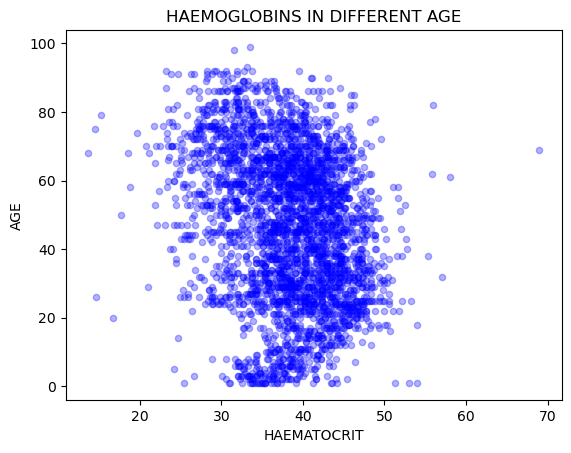

In [27]:
delays_df.plot(
               kind='scatter',
               x='HAEMATOCRIT',
               y='AGE',
               color='blue',
               alpha=0.3,
               title='HAEMOGLOBINS IN DIFFERENT AGE'
              )
plt.show()

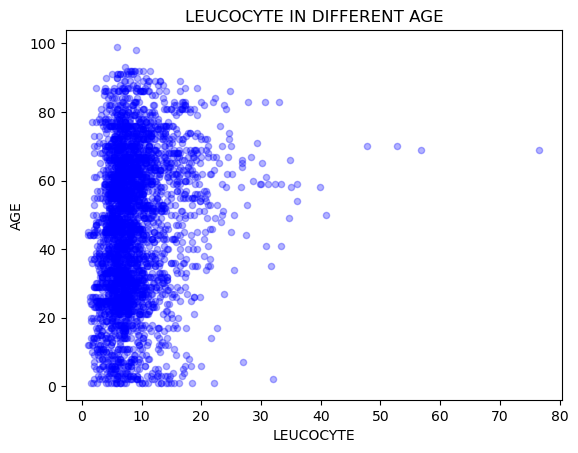

In [28]:
delays_df.plot(
               kind='scatter',
               x='LEUCOCYTE',
               y='AGE',
               color='blue',
               alpha=0.3,
               title='LEUCOCYTE IN DIFFERENT AGE'
              )
plt.show()

In [30]:
#Handling duplicate rows and rows with missing values
delays_df = pd.read_csv('dataset.csv')
delays_df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0


In [31]:
delays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   3309 non-null   float64
 1   HAEMOGLOBINS  3309 non-null   float64
 2   ERYTHROCYTE   3309 non-null   float64
 3   LEUCOCYTE     3309 non-null   float64
 4   THROMBOCYTE   3309 non-null   int64  
 5   MCH           3309 non-null   float64
 6   MCHC          3309 non-null   float64
 7   MCV           3309 non-null   float64
 8   AGE           3309 non-null   int64  
 9   SEX           3309 non-null   object 
 10  SOURCE        3309 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 284.5+ KB


In [32]:
delay_no_nulls_df = delays_df.dropna()
delay_no_nulls_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   3309 non-null   float64
 1   HAEMOGLOBINS  3309 non-null   float64
 2   ERYTHROCYTE   3309 non-null   float64
 3   LEUCOCYTE     3309 non-null   float64
 4   THROMBOCYTE   3309 non-null   int64  
 5   MCH           3309 non-null   float64
 6   MCHC          3309 non-null   float64
 7   MCV           3309 non-null   float64
 8   AGE           3309 non-null   int64  
 9   SEX           3309 non-null   object 
 10  SOURCE        3309 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 284.5+ KB


In [33]:
airports_df = pd.read_csv('dataset.csv')
airports_df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0


In [34]:
# Read data
diabetes = pd.read_csv('dataset.csv')
diabetes.head(2)

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0


In [35]:
print(diabetes.shape)

(3309, 11)


In [36]:
thyroid_data = pd.read_csv('dataset.csv')
print(thyroid_data.columns)

Index(['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
       'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX', 'SOURCE'],
      dtype='object')


In [37]:
thyroid_data.shape

(3309, 11)

In [38]:
thyroid_data.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0


In [39]:
thyroid_data.groupby('SOURCE').size()

SOURCE
0    1992
1    1317
dtype: int64

array([[<Axes: title={'center': 'HAEMATOCRIT'}>,
        <Axes: title={'center': 'HAEMOGLOBINS'}>,
        <Axes: title={'center': 'ERYTHROCYTE'}>],
       [<Axes: title={'center': 'LEUCOCYTE'}>,
        <Axes: title={'center': 'THROMBOCYTE'}>,
        <Axes: title={'center': 'MCH'}>],
       [<Axes: title={'center': 'MCHC'}>,
        <Axes: title={'center': 'MCV'}>, <Axes: title={'center': 'AGE'}>],
       [<Axes: title={'center': 'SOURCE'}>, <Axes: >, <Axes: >]],
      dtype=object)

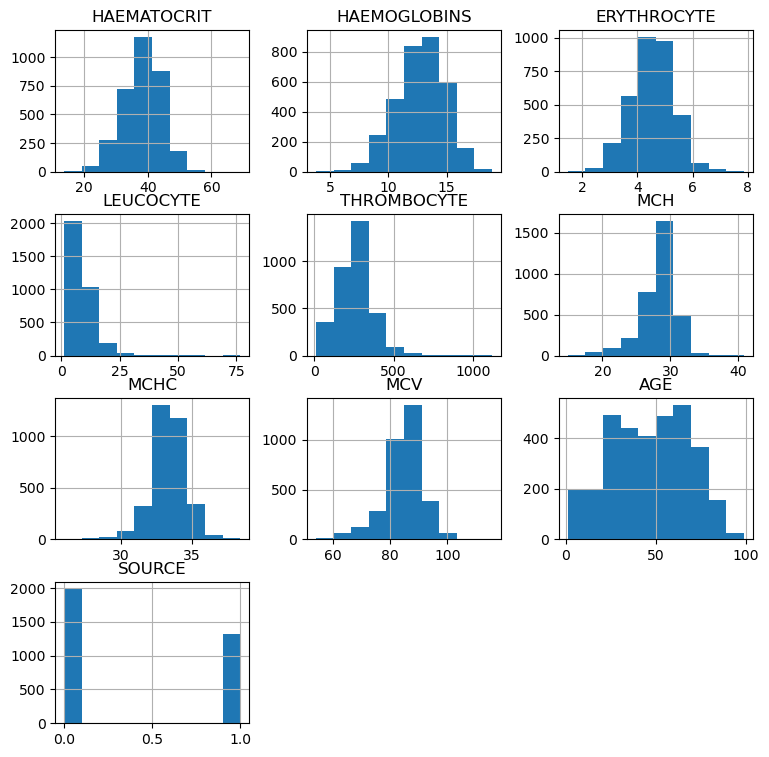

In [40]:
thyroid_data.hist(figsize=(9, 9))

In [41]:
thyroid_data.isnull().sum()

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

In [42]:
thyroid_data.isna().sum()

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

In [43]:
feature_names = ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE']
X = thyroid_data[feature_names]
y = thyroid_data.SOURCE

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [45]:
diabetes = pd.read_csv('dataset.csv')
print(diabetes.columns)

Index(['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
       'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX', 'SOURCE'],
      dtype='object')


In [46]:
diabetes.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0


In [47]:
print("Diabetes data set dimensions : {}".format(diabetes.shape))

Diabetes data set dimensions : (3309, 11)


In [48]:
diabetes.groupby('SOURCE').size()

SOURCE
0    1992
1    1317
dtype: int64

array([[<Axes: title={'center': 'HAEMATOCRIT'}>,
        <Axes: title={'center': 'HAEMOGLOBINS'}>,
        <Axes: title={'center': 'ERYTHROCYTE'}>],
       [<Axes: title={'center': 'LEUCOCYTE'}>,
        <Axes: title={'center': 'THROMBOCYTE'}>,
        <Axes: title={'center': 'MCH'}>],
       [<Axes: title={'center': 'MCHC'}>,
        <Axes: title={'center': 'MCV'}>, <Axes: title={'center': 'AGE'}>],
       [<Axes: title={'center': 'SOURCE'}>, <Axes: >, <Axes: >]],
      dtype=object)

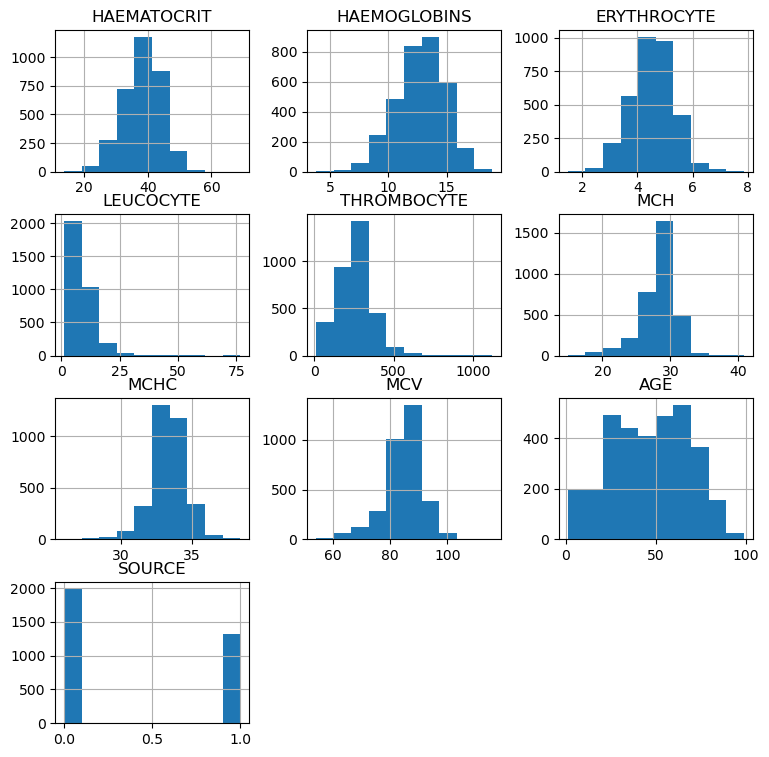

In [49]:
diabetes.hist(figsize=(9, 9))

SOURCE
0    [[Axes(0.125,0.722857;0.215278x0.157143), Axes...
1    [[Axes(0.125,0.722857;0.215278x0.157143), Axes...
dtype: object

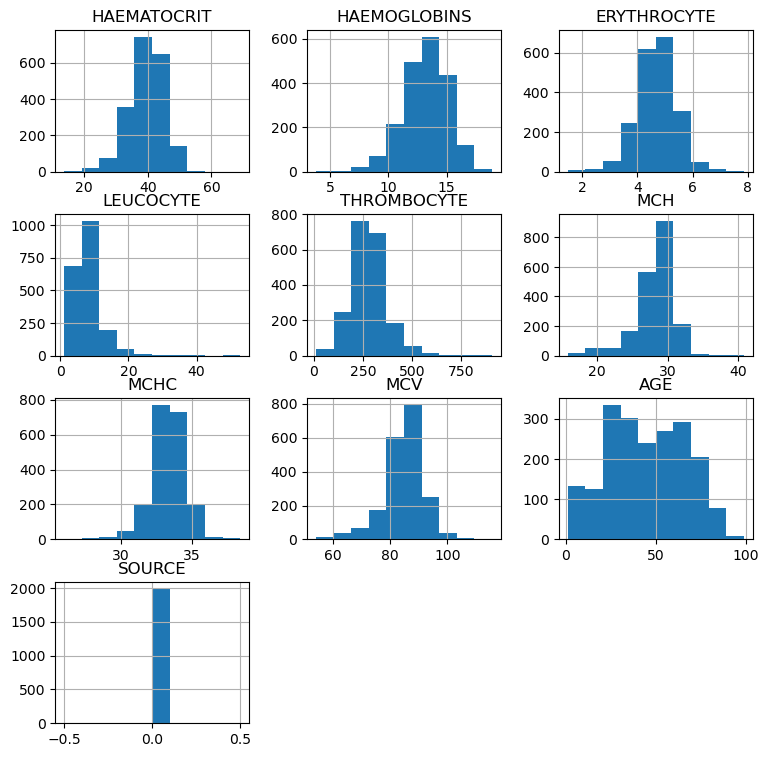

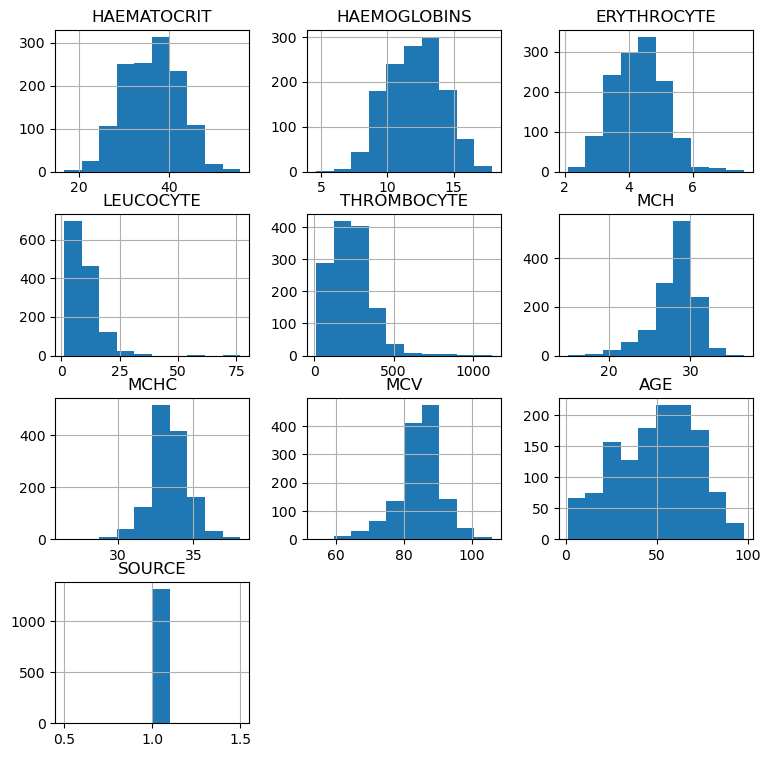

In [50]:
diabetes.groupby('SOURCE').hist(figsize=(9, 9))

In [51]:
diabetes.isnull().sum()

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

In [52]:
diabetes.isna().sum()

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

In [53]:
print("Total : ", diabetes[diabetes.HAEMATOCRIT == 1].shape[1])
print(diabetes[diabetes.HAEMATOCRIT == 1].groupby('SOURCE')['AGE'].count())

Total :  11
Series([], Name: AGE, dtype: int64)


In [54]:
print("Total : ", diabetes[diabetes.HAEMATOCRIT == 1].shape[1])
print(diabetes[diabetes.HAEMATOCRIT == 1].groupby('SOURCE')['AGE'].count())

Total :  11
Series([], Name: AGE, dtype: int64)


In [55]:
print("Total : ", diabetes[diabetes.THROMBOCYTE == 1].shape[1])
print(diabetes[diabetes.THROMBOCYTE == 1].groupby('SOURCE')['AGE'].count())

Total :  11
Series([], Name: AGE, dtype: int64)


In [56]:
print("Total : ", diabetes[diabetes.ERYTHROCYTE == 1].shape[1])
print(diabetes[diabetes.ERYTHROCYTE == 1].groupby('SOURCE')['AGE'].count())

Total :  11
Series([], Name: AGE, dtype: int64)


In [57]:
diabetes_mod = diabetes[(diabetes.MCH != 0) & (diabetes.THROMBOCYTE != 0) & (diabetes.ERYTHROCYTE != 0)]
print(diabetes_mod.shape)

(3309, 11)


In [58]:
# Features/Response
feature_names = ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV']
X = diabetes_mod[feature_names]
y = diabetes_mod.SOURCE

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [60]:
# Initial model selection process
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC(gamma='scale')))
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=4000)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('GB', GradientBoostingClassifier()))

In [61]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = diabetes_mod.SOURCE, random_state=0)

In [62]:
names = []
scores = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.667874
1  SVC  0.690821
2   LR  0.718599
3   DT  0.654589
4  GNB  0.716184
5   RF  0.736715
6   GB  0.728261


In [63]:
diabetes_mod = diabetes[(diabetes.AGE != 0) & (diabetes.SEX != 0) & (diabetes.SOURCE != 0)]

# Dimensions of data set after cleansing
print(diabetes_mod.shape)

(1317, 11)


In [64]:
# Features/Response
feature_names = ['MCH', 'MCHC', 'MCV', 'AGE']
X = diabetes_mod[feature_names]
y = diabetes_mod.SEX

In [65]:
logreg = LogisticRegression(C=1, multi_class='auto', penalty='none', solver='saga')


In [66]:
from sklearn.metrics import confusion_matrix
# Method to plot the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="WHITE" if cm[i, j] > thresh else "BLACK")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [67]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy {}".format(accuracy))

Accuracy 0.6242424242424243


C:\Users\Shaikh Fayaz\.conda\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Shaikh Fayaz\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [68]:
accuracy = cross_val_score(logreg, X, y, cv = 10, scoring='accuracy').mean()

print("Accuracy {}".format(accuracy))

C:\Users\Shaikh Fayaz\.conda\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Shaikh Fayaz\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Shaikh Fayaz\.conda\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Shaikh Fayaz\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Shaikh Fayaz\.conda\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be rem

Accuracy 0.5960906777700672


C:\Users\Shaikh Fayaz\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Shaikh Fayaz\.conda\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Shaikh Fayaz\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
# Method to plot the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [71]:
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[ 56  89]
 [ 35 150]]


Confusion matrix, without normalization
[[ 56  89]
 [ 35 150]]


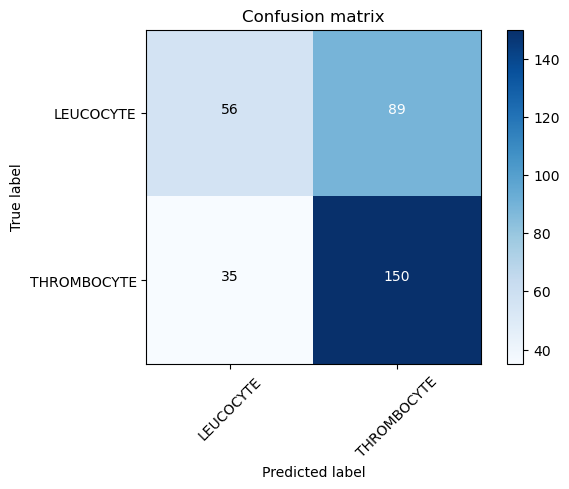

In [72]:
plot_confusion_matrix(confusion, classes=['LEUCOCYTE', 'THROMBOCYTE'], title='Confusion matrix')

In [73]:
# True Positives
TP = confusion[1, 1]

# True Negatives
TN = confusion[0, 0] 

# False Positives
FP = confusion[0, 1] 

# False Negatives
FN = confusion[1, 0] 

In [74]:
from sklearn.metrics import recall_score, precision_score

In [75]:
print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_test, y_pred))

0.6242424242424243
0.6242424242424243


In [76]:
print(TN / float(TN + FP))

0.38620689655172413


In [77]:
print(FP / float(TN + FP))

0.6137931034482759


In [78]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array(['M', 'F', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'M'], dtype=object)

In [79]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[0.49392613, 0.50607387],
       [0.61376631, 0.38623369],
       [0.43367705, 0.56632295],
       [0.41036958, 0.58963042],
       [0.39935792, 0.60064208],
       [0.39644967, 0.60355033],
       [0.39436116, 0.60563884],
       [0.50777878, 0.49222122],
       [0.47563953, 0.52436047],
       [0.47422916, 0.52577084]])

In [80]:
# store the predicted probabilities for class 1 (diabetic)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

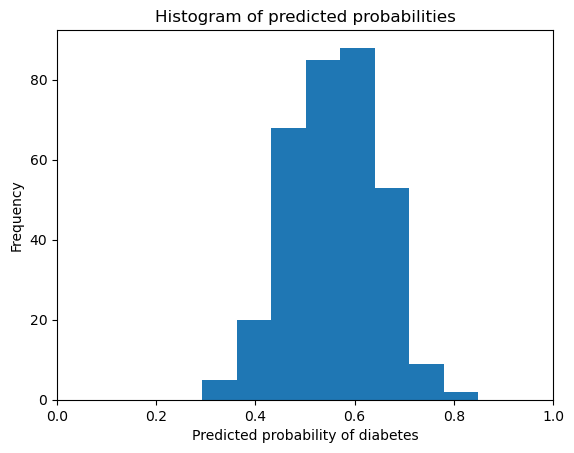

In [81]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8, linewidth=1.2)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [82]:
# True Positives
TP = confusion[1, 1]

# True Negatives
TN = confusion[0, 0] 

# False Positives
FP = confusion[0, 1] 

# False Negatives
FN = confusion[1, 0] 

In [83]:
# specificity has decreased
print(TN / float(TN + FP))

0.38620689655172413
